In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout

# Carga el dataset LFW
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=1, color=False, download_if_missing=True)

# Inspección de los tamaños
n_samples, h, w = lfw_people.images.shape

# Datos sin dividir en subconjuntos
X = lfw_people.images
X = X[..., np.newaxis]  # Añadir una dimensión para el canal de color (necesario para la red convolucional)
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

print("Total dataset size:")
print("h, w: (%d, %d)" % (h, w))
print("n_samples: %d" % n_samples)
print("n_classes: %d" % n_classes)


Total dataset size:
h, w: (125, 94)
n_samples: 1288
n_classes: 7


In [3]:
# Separa el dataset en conjuntos de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [4]:
# Normaliza los datos
scaler = StandardScaler()
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)
X_train_flat = scaler.fit_transform(X_train_flat)
X_test_flat = scaler.transform(X_test_flat)
X_train = X_train_flat.reshape(X_train.shape)
X_test = X_test_flat.reshape(X_test.shape)

In [5]:
# Separa el dataset en conjuntos de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Normalizar los datos
scaler = StandardScaler()
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)
X_train_flat = scaler.fit_transform(X_train_flat)
X_test_flat = scaler.transform(X_test_flat)
X_train = X_train_flat.reshape(X_train.shape)
X_test = X_test_flat.reshape(X_test.shape)

In [7]:
# Modelo 2: Red convolucional
conv_model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(h, w, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.3),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.3),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.4),
    Dense(n_classes, activation='softmax')
])

conv_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                   loss='sparse_categorical_crossentropy', metrics=['accuracy'])
conv_model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.2)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 19s 590ms/step - accuracy: 0.3593 - loss: 1.7907 - val_accuracy: 0.5049 - val_loss: 1.6365
Epoch 2/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 16s 613ms/step - accuracy: 0.4804 - loss: 1.4441 - val_accuracy: 0.5243 - val_loss: 1.3516
Epoch 3/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 20s 587ms/step - accuracy: 0.5352 - loss: 1.2423 - val_accuracy: 0.6505 - val_loss: 1.2053
Epoch 4/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 20s 576ms/step - accuracy: 0.6446 - loss: 1.0351 - val_accuracy: 0.6602 - val_loss: 1.0277
Epoch 5/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 21s 581ms/step - accuracy: 0.7228 - loss: 0.8244 - val_accuracy: 0.7136 - val_loss: 0.8993
Epoch 6/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 20s 579ms/step - accuracy: 0.7676 - loss: 0.7128 - val_accuracy: 0.7136 - val_loss: 0.8957
Epoch 7/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 20s 565ms/step - accuracy: 0.7692 - loss: 0.7005 - val_accuracy: 0.7233 - val_loss: 0.8048
Epoch 8/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 21s 580ms/step - accuracy: 0.8062 - loss: 0.5920 - val_accu

In [8]:
# Evalua el modelo convolucional ajustado
conv_train_accuracy = conv_model.evaluate(X_train, y_train)[1]
conv_test_accuracy = conv_model.evaluate(X_test, y_test)[1]
print(f"Convolutional Model - Training Accuracy: {conv_train_accuracy}")
print(f"Convolutional Model - Test Accuracy: {conv_test_accuracy}")

33/33 ━━━━━━━━━━━━━━━━━━━━ 12s 359ms/step - accuracy: 0.9920 - loss: 0.0673
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 283ms/step - accuracy: 0.8571 - loss: 0.6010
Convolutional Model - Training Accuracy: 0.955339789390564
Convolutional Model - Test Accuracy: 0.8488371968269348


9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 163ms/step


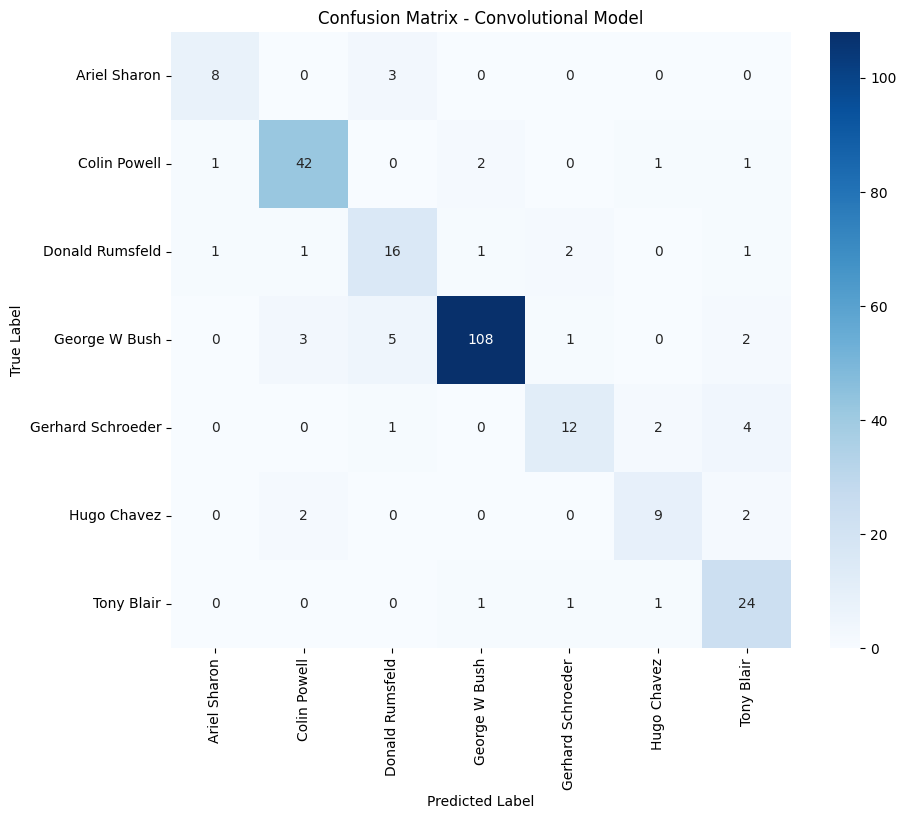

In [9]:
# Matriz de confusión para el modelo convolucional
y_pred_conv = np.argmax(conv_model.predict(X_test), axis=-1)
conf_matrix_conv = confusion_matrix(y_test, y_pred_conv)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_conv, annot=True, fmt="d", cmap="Blues", xticklabels=target_names, yticklabels=target_names)
plt.title("Confusion Matrix - Convolutional Model")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()